In [1]:
import requests
import pandas as pd
from collections import Counter
import ast
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(30,10)}
        )

In [3]:
#declaring variables

job_title = ['NAME:("PHP разработчик")'] #  add the vacancy we are interested in and the search field 
geo = ['113', '5', '40', '16'] #113 - Russia, 5 - Ukraine, 40 - Kazakhstan, 16 - Belarus

In [4]:
#for NO exp

number_of_pages = 100

for job in job_title:
    data=[]
    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {'text': job, 'area': geo, 'per_page':'20', 'page':i, 'experience': 'noExperience'}
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        df = pd.DataFrame(columns= list(vacancy_details))
        ind = 0
        for i in range(len(data)):
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    csv_name_NO ="_forNO.csv" #we can add a job title via .format (where name starts with '_') if the title is short

    NO = df.to_csv(csv_name_NO)

print(csv_name_NO)

_forNO.csv


In [5]:
#for 1to3 exp

number_of_pages = 100

for job in job_title:
    data=[]
    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {'text': job, 'area': geo, 'per_page':'20', 'page':i, 'experience': 'between1And3'}
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        df = pd.DataFrame(columns= list(vacancy_details))
        ind = 0
        for i in range(len(data)):
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    csv_name_1to3 ="_1to3.csv"
    df.to_csv(csv_name_1to3)

print(csv_name_1to3)

1to3.csv


In [6]:
#for 3to6 exp

number_of_pages = 100

for job in job_title:
    data=[]
    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {'text': job, 'area': geo, 'per_page':'20', 'page':i, 'experience': 'between3And6'}
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        df = pd.DataFrame(columns= list(vacancy_details))
        ind = 0
        for i in range(len(data)):
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    csv_name_3to6 = "_3to6.csv"
    df.to_csv(csv_name_3to6)

print(csv_name_3to6)

 3to6.csv


In [7]:
#for 6+ exp

number_of_pages = 100

for job in job_title:
    data=[]
    for i in range(number_of_pages):
        url = 'https://api.hh.ru/vacancies'
        par = {'text': job, 'area': geo, 'per_page':'20', 'page':i, 'experience': 'moreThan6'}
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        df = pd.DataFrame(columns= list(vacancy_details))
        ind = 0
        for i in range(len(data)):
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    csv_name_more6 = "_more6.csv"
    df.to_csv(csv_name_more6)

print(csv_name_more6)

 more6.csv


In [8]:
df_NO = pd.read_csv(csv_name_NO)
df_NO['experience'] = 'before1'
df_1to3 = pd.read_csv(csv_name_1to3)
df_1to3['experience'] = 'between1And3'
df_3to6 = pd.read_csv(csv_name_3to6)
df_3to6['experience'] = 'between3And6'
df_more6 = pd.read_csv(csv_name_more6)
df_more6['experience'] = 'moreThan6' 

df = pd.concat([df_NO, df_1to3, df_3to6, df_more6]).reset_index()

In [9]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df['cities'] = df.area.apply(eval).apply(lambda x : x['name'])
df['salary_from'] = df.salary.dropna().apply(eval).apply(lambda x : x['from'])
df['salary_to'] = df.salary.dropna().apply(eval).apply(lambda x : x['to'])
df['currency'] = df.salary.dropna().apply(eval).apply(lambda x : x['currency'])
df['employer_brand'] = df.employer.dropna().apply(eval).apply(lambda x : x['name'])
df['requirement'] = df.snippet.dropna().apply(eval).apply(lambda x : x['requirement'])
df['responsibility'] = df.snippet.dropna().apply(eval).apply(lambda x : x['responsibility'])
df['salary_av'] = (df.salary_from+df.salary_to)/2
df['published_at'] = pd.to_datetime(df.published_at)
df['created_at'] = pd.to_datetime(df.created_at)
df['published_at'] = df.published_at.dt.date
df['created_at'] = df.created_at.dt.date

df_cut = df.drop(columns=['index', 'Index', 'premium', 'response_letter_required', 'area', 'salary', 'type', 'address', 'response_url', 'sort_point_distance', 'employer', 'apply_alternate_url', 'insider_interview', 'url', 'alternate_url', 'relations', 'snippet', 'has_test', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary'])
df_cut.head()


,id,name,department,published_at,created_at,archived,contacts,schedule,experience,cities,salary_from,salary_to,currency,employer_brand,requirement,responsibility,salary_av
0,41445276,PHP Developer,NaN,2021-03-02,2021-03-02,False,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",before1,Минск,1000.0,NaN,USD,"ЭЛЕКТРОСИЛА, сеть магазинов",Уметь программировать на PHP(Native)+MySQL. Зн...,Программировать на РНР Native . Осуществлять т...,NaN
1,42488482,Начинающий PHP разработчик,NaN,2021-03-02,2021-03-02,False,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",before1,Пенза,40000.0,NaN,RUR,Информационные системы для бизнеса,"Технологии: PHP, Java, NodeJS, Mysql, Elastics...","Изучение и применение новых, современных техно...",NaN
2,41719049,Backend php разработчик (Junior),NaN,2021-03-02,2021-03-02,False,NaN,"{'id': 'remote', 'name': 'Удаленная работа'}",before1,Уфа,50000.0,NaN,RUR,ИНТАС-Компани,Начинающий специалист ( без опыта - опыт 1 год...,None,NaN
3,41804136,Junior PHP-разработчик (full stack),NaN,2021-03-05,2021-03-05,False,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",before1,Москва,120000.0,NaN,RUR,ЕВРОСЕРВИС,Высшее техническое образование. Умение разбира...,Анализ предметной области. Оптимизация и автом...,NaN
4,39802762,PHP-разработчик,NaN,2021-03-02,2021-03-02,False,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",before1,Москва,NaN,NaN,NaN,Group-IB,Хорошо знаешь PHP7. Знаешь JavaScript. Знаешь ...,Отдел занимается защитой цифрового контента: ф...,NaN


In [10]:
df_cut.query("salary_from>0 and currency == 'RUR'")
df_cut.shape

(1580, 17)

In [11]:
salary_from_per_city = df_cut.query("salary_from>0 and currency == 'RUR'")\
    .groupby(['cities', 'experience'], as_index=False)\
    .agg({'id': 'count', 'salary_from': 'median'})\
    .sort_values('id', ascending=False)\
    .rename(columns={'id': 'vacancies_with_salary_from'})

In [12]:
salary_from_per_city.vacancies_with_salary_from.sum()

724

In [13]:
# find the average for the lower limits of salaries (by city and by experience)

salary_from_per_city = salary_from_per_city.pivot(index='cities', columns='experience', values=['vacancies_with_salary_from', 'salary_from'])
salary_from_per_city.to_csv("_salary_from_per_city.csv")

In [14]:
salary_per_city = df_cut.query('currency == "RUR"')\
    .query('salary_av > 0')\
    .groupby(['cities', 'experience'], as_index=False)\
    .agg({'id': 'count', 'salary_av': 'median'})\
    .sort_values('id', ascending=False)\
    .rename(columns={'id': 'vacancies_with_salary'})

In [15]:
# find the average of the average salaries (where the upper and lower bounds are indicated) by city and by experience

salary_per_city = salary_per_city.pivot(index='cities', columns='experience', values=['vacancies_with_salary', 'salary_av'])

salary_per_city.to_csv("_salary_per_city.csv")

In [16]:
# find the distribution of vacancies by city

city = df_cut.groupby(['cities'], as_index=False)\
    .agg({'id': 'count'})\
    .sort_values('id', ascending=False)\
    .rename(columns={'id': 'vacancies'})

city.to_csv("_city.csv")

In [17]:
# find the distribution of vacancies by experience


exp = df_cut.groupby(['experience'], as_index=False)\
    .agg({'id': 'count'})\
    .sort_values('id', ascending=False)\
    .rename(columns={'id': 'vacancies'})

exp.to_csv("_exp.csv")

In [18]:
# find the average of the average salaries (where the upper and lower bounds are indicated) by company and by experience


salary_per_brand = df_cut.query('currency == "RUR"')\
    .query('salary_av > 0')\
    .groupby(['employer_brand', 'experience'], as_index=False)\
    .agg({'id': 'count', 'salary_av': 'median'})\
    .sort_values('id', ascending=False)\
    .rename(columns={'id': 'vacancies_with_salary'})

In [19]:
salary_per_brand = salary_per_brand.pivot(index='employer_brand', columns='experience', values=['vacancies_with_salary', 'salary_av'])

salary_per_brand.to_csv("_salary_per_brand.csv")

In [20]:
# find the distribution of vacancies by company

brand = df_cut.groupby(['employer_brand'], as_index=False)\
    .agg({'id': 'count'})\
    .sort_values('id', ascending=False)\
    .rename(columns={'id': 'vacancies'})

brand.to_csv("_brand.csv")

In [21]:
# find the most common words from responsibility - part 

df_cut['responsibility'] = df_cut['responsibility'].astype('str')

In [22]:
most_common_words_responsibility_NO = pd.Series(' '.join(df_cut.query('experience == "before1"').responsibility).lower().split()).value_counts()[:100]
most_common_words_responsibility_1to3 = pd.Series(' '.join(df_cut.query('experience == "between1And3"').responsibility).lower().split()).value_counts()[:100]
most_common_words_responsibility_3to6 = pd.Series(' '.join(df_cut.query('experience == "between3And6"').responsibility).lower().split()).value_counts()[:100]
most_common_words_responsibility_more6 = pd.Series(' '.join(df_cut.query('experience == "moreThan6"').responsibility).lower().split()).value_counts()[:100]



In [23]:
most_common_words_responsibility_NO_pd = pd.DataFrame(most_common_words_responsibility_NO)
most_common_words_responsibility_NO_pd['experience'] = 'before1'

most_common_words_responsibility_1to3_pd = pd.DataFrame(most_common_words_responsibility_1to3)
most_common_words_responsibility_1to3_pd['experience'] = 'between1And3'

most_common_words_responsibility_3to6_pd = pd.DataFrame(most_common_words_responsibility_3to6)
most_common_words_responsibility_3to6_pd['experience'] = 'between3And6'

most_common_words_responsibility_more6_pd = pd.DataFrame(most_common_words_responsibility_more6)
most_common_words_responsibility_more6_pd['experience'] = 'moreThan6'

In [24]:
most_common_words_responsibility_pd = pd.concat([most_common_words_responsibility_NO_pd, most_common_words_responsibility_1to3_pd, most_common_words_responsibility_3to6_pd, most_common_words_responsibility_more6_pd])\
    .reset_index()\
    .replace(',', '')\
    .replace('.', '')\
    .replace('(', '')\
    .replace(')', '')\
    .replace('<highlighttext>', '')\
    .replace('</highlighttext>', '')\
    .replace('<highlighttext>', '')\
    .query('index != "и" and index != "для" and index != "в" and index != "с" and index != "на" and index != "по" and index != "-" and index != "and" and index != "of" and index != "in" and index != "the" and index != "with" and index != "to"')\
    .sort_values(0, ascending=False)\
    .rename(columns={0: 'frecuency'})\
    .head(150)\


In [25]:
most_common_words_responsibility_pivot = most_common_words_responsibility_pd.pivot_table(index= 'index', columns= 'experience', values= 'frecuency')

most_common_words_responsibility_pivot.to_csv("_pivot_responsibility.csv")

In [26]:
# investigate the distribution of vacancies by publication dates

published_at = df_cut.groupby(['published_at'], as_index=False)\
    .agg({'id': 'count'})\
    .sort_values('published_at', ascending=True)\
    .rename(columns={'id': 'vacancies'})


[Text(0, 0.5, 'количество вакансий\n'), Text(0.5, 0, '\nпубликация вакансии')]

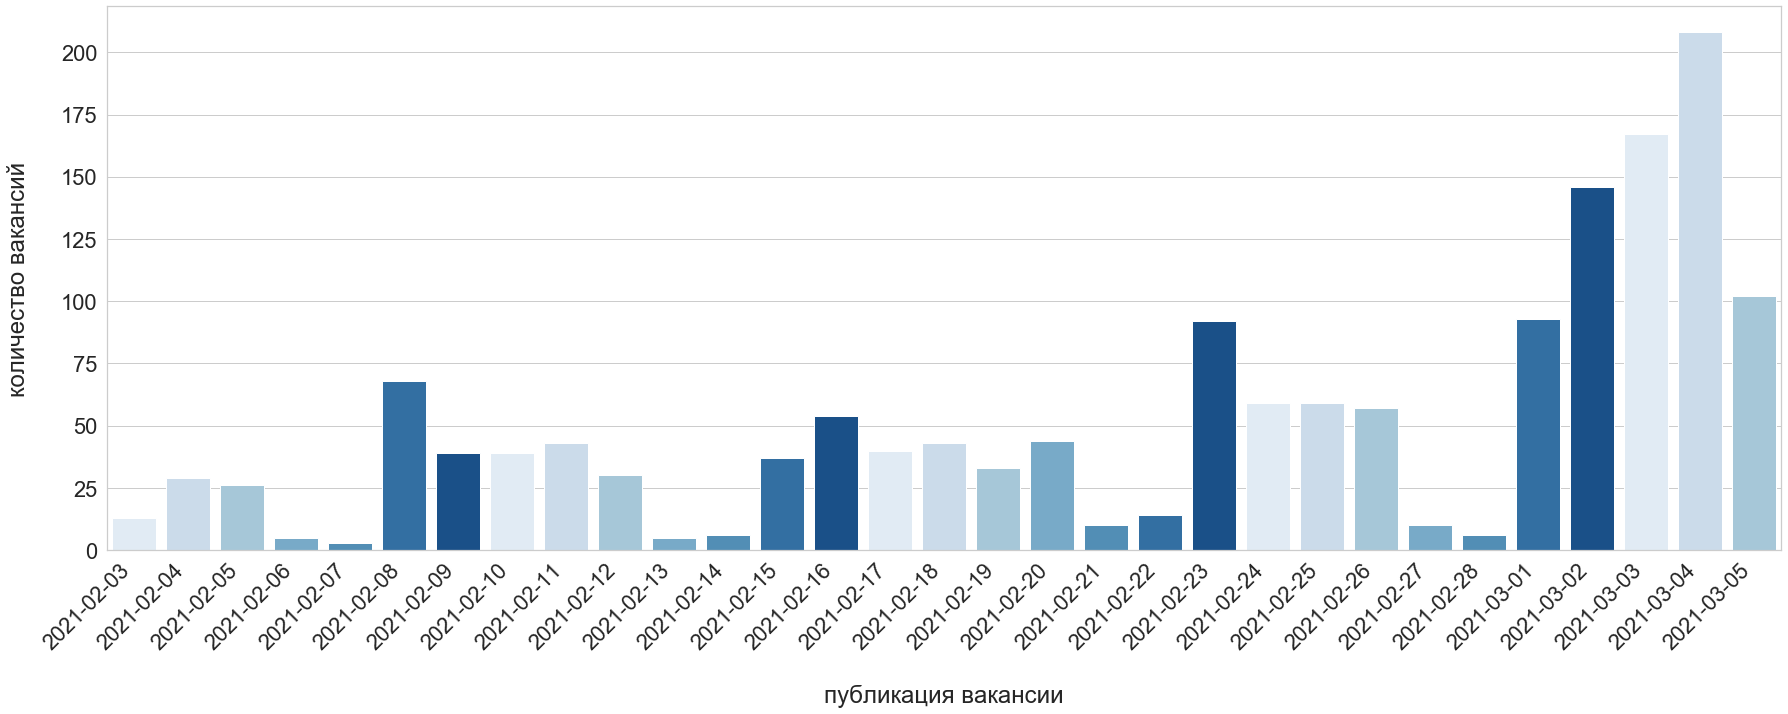

In [27]:
chart = sns.barplot(data=published_at, x="published_at", y="vacancies", palette=sns.color_palette('Blues', n_colors=7),)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set(xlabel='\nпубликация вакансий', ylabel='количество вакансий\n') # we can copy this graph


In [28]:
published_at

,published_at,vacancies
0,2021-02-03,13
1,2021-02-04,29
2,2021-02-05,26
3,2021-02-06,5
4,2021-02-07,3
5,2021-02-08,68
6,2021-02-09,39
7,2021-02-10,39
8,2021-02-11,43
9,2021-02-12,30
